In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "matplotlib-challenge/data/Mouse_metadata.csv"
study_results_path = "matplotlib-challenge/data/Study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [13]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [14]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [15]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [24]:
# Combine the data into a single dataset

resultsDF = study_results.merge(mouse_metadata,how='left', on='Mouse ID')

In [25]:
resultsDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [26]:
# Display the data table for preview
resultsDF.head(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [28]:
# Checking the number of mice.
clean_results = resultsDF.drop_duplicates()

In [29]:
clean_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateRowsDF = resultsDF[resultsDF.duplicated()]

In [35]:
duplicateRowsDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [ ]:
# Checking the number of mice in the clean DataFrame.

In [51]:
len(clean_results)

1892

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


In [ ]:
#Capomulin
#Ketapril
#Placebo
#Stelasyn
#Infubinol
#Naftisol

In [53]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

clean_results['Tumor Volume (mm3)'].describe()

count    1892.000000
mean       50.451260
std         8.896191
min        22.050126
25%        45.000000
50%        48.954697
75%        56.298917
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [55]:
clean_mean = clean_results.groupby("Drug Regimen").mean()
clean_mean
#Here is a clean dataframe with all of the mean for each drug regimen. I love a clean dataframe.

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,21.565217,40.675741,0.713043,13.456522,19.965217
Ceftamin,19.747191,52.591172,1.179775,13.247191,27.398876
Infubinol,18.174157,52.884795,0.960674,16.230337,27.196629
Ketapril,19.707447,55.235638,1.297872,15.659574,27.861702
Naftisol,19.623656,54.331565,1.182796,12.000000,27.166667
Placebo,18.674033,54.033581,1.441989,10.734807,27.928177
Propriva,16.968750,52.368318,0.981250,10.831250,27.050000
Ramicane,21.425439,40.216745,0.548246,10.684211,19.679825
Stelasyn,19.226519,54.233149,0.872928,12.784530,27.856354


In [77]:
drug_regimen = clean_results.groupby('Drug Regimen')
drug_regimen.first()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.0,0,Female,9,22
Ceftamin,x822,0,45.0,0,Male,3,29
Infubinol,c326,0,45.0,0,Female,18,25
Ketapril,f932,0,45.0,0,Male,15,29
Naftisol,f993,0,45.0,0,Male,21,28
Placebo,a897,0,45.0,0,Male,7,28
Propriva,g989,0,45.0,0,Female,21,26
Ramicane,c458,0,45.0,0,Female,23,20
Stelasyn,f234,0,45.0,0,Male,14,28


In [76]:
Capomulin = drug_regimen.get_group('Capomulin')
Capomulin
#Results for Capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Female,9,22
226,j246,0,45.000000,0,Female,21,21
227,r554,0,45.000000,0,Female,8,17
228,s185,0,45.000000,0,Female,3,17
229,b742,0,45.000000,0,Male,7,21
...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Female,1,23
1859,j119,45,38.125164,1,Female,7,23
1878,i557,45,47.685963,1,Female,1,24
1888,r944,45,41.581521,2,Male,12,25


In [78]:
Capomulin.describe()
#I isolated a single drug regimen and put the stats for that treatment into a dataframe.
#Perhaps it would be easier to do it another way, by groupby and stat type.
#The value from this method, though, is the same as when I did a mean on its own.
#So that's gratifying.

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,230.000000,230.000000,230.000000,230.000000,230.000000
mean,21.565217,40.675741,0.713043,13.456522,19.965217
std,14.384994,4.994774,0.848993,7.721423,2.732404
min,0.000000,23.343598,0.000000,1.000000,15.000000
25%,10.000000,37.685933,0.000000,7.000000,17.000000
50%,20.000000,41.557809,0.000000,16.500000,20.500000
75%,35.000000,45.000000,1.000000,20.000000,22.000000
max,45.000000,48.158209,3.000000,24.000000,25.000000


In [59]:
regimen_mean = clean_results.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = clean_results.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = clean_results.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = clean_results.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean_results.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.514041
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [60]:
summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats_table

In [61]:
summary_stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [79]:
single_group_by = clean_results.groupby('Drug Regimen')
summary_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen.

In [85]:
mouse_count = clean_results.groupby("Drug Regimen").count()['Mouse ID']
mouse_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     160
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [89]:
mouse_count = mouse_count.to_frame()

In [90]:
mouse_count

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,160
Ramicane,228
Stelasyn,181


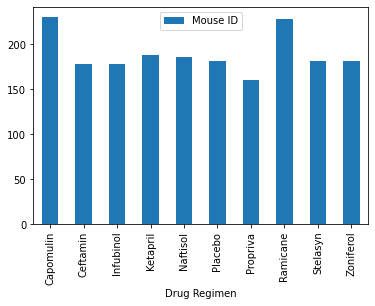

In [103]:
mouse_count.plot.bar(y='Mouse ID')

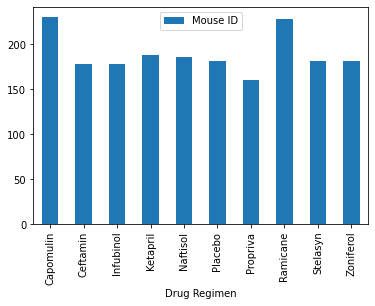

In [107]:
mouse_count.plot(kind="bar");

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [125]:
gender_mice = clean_results[['Mouse ID', 'Sex']]

In [198]:
gender_count = gender_mice.groupby('Mouse ID')
gender_count = gender_count.first()

In [199]:
gender_count

,Sex
Mouse ID,
a203,Female
a251,Female
a262,Female
a275,Female
a366,Female
...,...
z435,Female
z578,Male
z581,Female


In [204]:
gender_countDF = gender_count['Sex'].value_counts(sort=True)

In [207]:
gender_countDF = pd.DataFrame(gender_countDF)

In [208]:
gender_countDF

,Sex
Male,125
Female,124


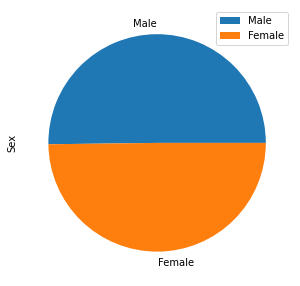

In [212]:
plot = gender_countDF.plot.pie(y='Sex', figsize=(5, 5))

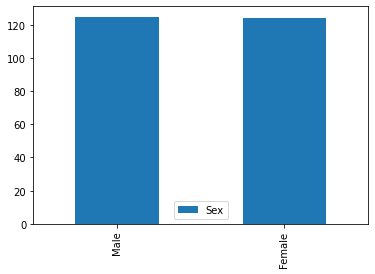

In [213]:
gender_countDF.plot.bar(y='Sex')
#I felt like a bar chart might be a better representation.

<ipython-input-217-a3edc2af7c22>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(gender_countDF, labels=labels, autopct='%1.1f%%',


([<matplotlib.patches.Wedge at 0x1222b2820>,
 [Text(-1.0999781124353174, -0.006939175976765592, 'Male'),
  Text(1.0999781124353174, 0.006939175976765457, 'Female')],
 [Text(-0.5999880613283548, -0.003785005078235777, '50.2%'),
  Text(0.5999880613283548, 0.0037850050782357036, '49.8%')])

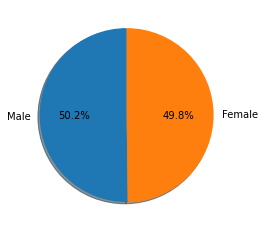

In [217]:
labels = 'Male', 'Female'
fig1, ax1 = plt.subplots()
ax1.pie(gender_countDF, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

In [218]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [219]:
#I already got Capomulin
#Now to repeat the process

In [221]:
Capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Female,9,22
226,j246,0,45.000000,0,Female,21,21
227,r554,0,45.000000,0,Female,8,17
228,s185,0,45.000000,0,Female,3,17
229,b742,0,45.000000,0,Male,7,21
...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Female,1,23
1859,j119,45,38.125164,1,Female,7,23
1878,i557,45,47.685963,1,Female,1,24
1888,r944,45,41.581521,2,Male,12,25


In [224]:
Ramicane = drug_regimen.get_group('Ramicane')
Infubinol = drug_regimen.get_group('Infubinol')
Ceftamin = drug_regimen.get_group('Ceftamin')

In [223]:
Ramicane

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
58,c458,0,45.000000,0,Female,23,20
59,q610,0,45.000000,0,Female,18,21
60,j913,0,45.000000,0,Female,4,17
61,a411,0,45.000000,0,Male,3,22
62,a444,0,45.000000,0,Female,10,25
...,...,...,...,...,...,...,...
1867,u196,45,40.667713,3,Male,18,25
1870,g791,45,29.128472,1,Male,11,16
1874,r811,45,37.225650,1,Male,9,19
1879,a644,45,32.978522,1,Female,7,17


In [249]:
Capomulin_last = Capomulin.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_df = pd.merge(Capomulin_vol, clean_results, on=("Mouse ID","Timepoint"),how="left")
Capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [248]:
Ramicane_last = Ramicane.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_df = pd.merge(Ramicane_vol, clean_results, on=("Mouse ID","Timepoint"),how="left")
Ramicane_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20
5,c758,45,33.397653,1,Ramicane,Male,9,17
6,d251,45,37.311236,2,Ramicane,Female,8,19
7,e662,45,40.659006,2,Ramicane,Male,8,24
8,g791,45,29.128472,1,Ramicane,Male,11,16
9,i177,45,33.562402,3,Ramicane,Male,10,18


In [250]:
#Infubinol
Infubinol_last = Infubinol.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_df = pd.merge(Infubinol_vol, clean_results, on=("Mouse ID","Timepoint"),how="left")
Infubinol_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28
5,c326,5,36.321346,0,Infubinol,Female,18,25
6,c895,30,60.969711,2,Infubinol,Female,7,29
7,e476,45,62.435404,1,Infubinol,Male,23,26
8,f345,45,60.918767,1,Infubinol,Male,23,26
9,i386,40,67.289621,4,Infubinol,Female,23,29


In [252]:
#Ceftamin
Ceftamin_last = Ceftamin.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_df = pd.merge(Ceftamin_vol, clean_results, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25
5,h531,5,47.784682,0,Ceftamin,Male,5,27
6,j296,45,61.849023,3,Ceftamin,Female,24,30
7,k210,45,68.923185,3,Ceftamin,Male,15,28
8,l471,45,67.748662,1,Ceftamin,Female,7,28
9,l490,30,57.918381,3,Ceftamin,Male,24,26


In [253]:
# Put treatments into a list for for loop (and later for plot labels)

In [254]:
treatments = [Capomulin, Ramicane, Infubinol, Ceftamin]

In [255]:
treatments

[     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites     Sex  \
 0        b128          0           45.000000                 0  Female   
 226      j246          0           45.000000                 0  Female   
 227      r554          0           45.000000                 0  Female   
 228      s185          0           45.000000                 0  Female   
 229      b742          0           45.000000                 0    Male   
 ...       ...        ...                 ...               ...     ...   
 1854     s710         45           40.728578                 1  Female   
 1859     j119         45           38.125164                 1  Female   
 1878     i557         45           47.685963                 1  Female   
 1888     r944         45           41.581521                 2    Male   
 1889     u364         45           31.023923                 3    Male   
 
       Age_months  Weight (g)  
 0              9          22  
 226           21          21  
 2

In [256]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

##calculate interquartile range 
#q3, q1 = np.percentile(data, [75 ,25])
#iqr = q3 - q1

In [259]:
Capomulin_q3, Capomulin_q1 = np.percentile(Capomulin_df['Tumor Volume (mm3)'], [75 ,25])

In [260]:
Capomulin_q3

40.1592203

In [261]:
Capomulin_q1

32.37735684

In [262]:
Ramicane_q3, Ramicane_q1 = np.percentile(Ramicane_df['Tumor Volume (mm3)'], [75 ,25])

In [263]:
Ramicane_q3

40.65900627

In [264]:
Ramicane_q1

31.56046955

In [265]:
#Infubinol
Infubinol_q3, Infubinol_q1 = np.percentile(Infubinol_df['Tumor Volume (mm3)'], [75 ,25])
#Ceftamin
Ceftamin_q3, Ceftamin_q1 = np.percentile(Ceftamin_df['Tumor Volume (mm3)'], [75 ,25])

In [266]:
Ceftamin_iqr = Ceftamin_q3-Ceftamin_q1

In [267]:
Ceftamin_iqr

15.577752179999997

In [268]:
Infubinol_iqr = Infubinol_q3-Infubinol_q1
Ramicane_iqr = Ramicane_q3-Ramicane_q1
Capomulin_iqr = Capomulin_q3-Capomulin_q1

In [282]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = pd.concat([Ceftamin_df, Infubinol_df, Ramicane_df, Capomulin_df], axis=1)

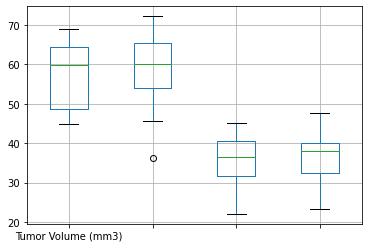

In [283]:
boxplot = data_to_plot.boxplot(column=['Tumor Volume (mm3)'])

In [291]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#g288

In [294]:
Capomulin_line = clean_results.loc[clean_results["Mouse ID"] == "g288",:]

In [295]:
Capomulin_line

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
242,g288,0,45.000000,0,Capomulin,Male,3,19
474,g288,5,45.839400,0,Capomulin,Male,3,19
523,g288,10,46.304003,1,Capomulin,Male,3,19
727,g288,15,42.172301,1,Capomulin,Male,3,19
1083,g288,20,42.957120,1,Capomulin,Male,3,19
1246,g288,25,42.368692,1,Capomulin,Male,3,19
1392,g288,30,42.874461,1,Capomulin,Male,3,19
1540,g288,35,38.954115,1,Capomulin,Male,3,19
1758,g288,40,36.356851,1,Capomulin,Male,3,19
1777,g288,45,37.074024,1,Capomulin,Male,3,19


In [296]:
x_axis = Capomulin_line["Timepoint"]
y_axis = Capomulin_line["Tumor Volume (mm3)"]

Text(0, 0.5, 'Tumor Volume (mm3)')

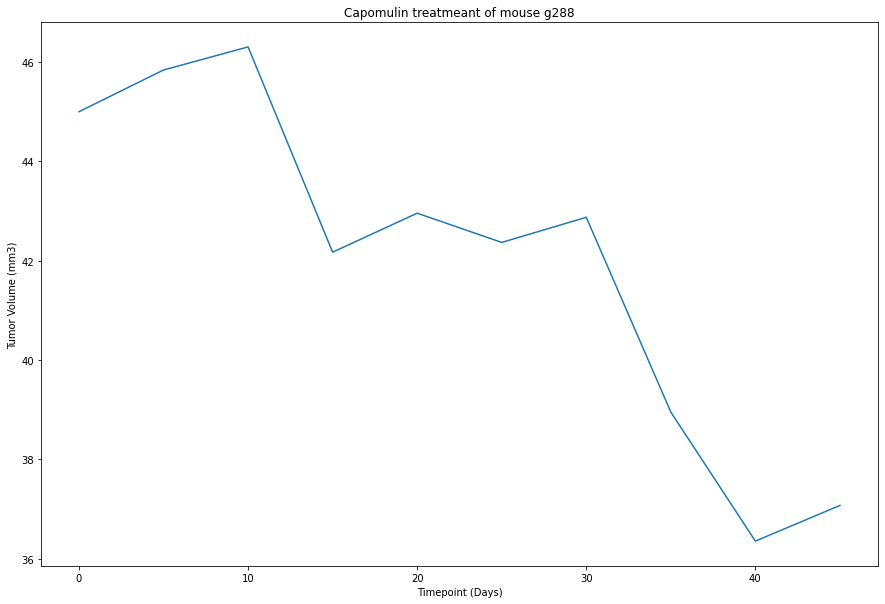

In [302]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse g288')
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


In [303]:
#Wow, the size of g288's tumor shrank significantly from treatments.
#I'm curious and want to see a mouse from the other treatments.

In [309]:
#Infubinol

Infubinol_line = clean_results.loc[clean_results["Mouse ID"] == "e476",:]
Infubinol_x_axis = Infubinol_line["Timepoint"]
Infubinol_y_axis = Infubinol_line["Tumor Volume (mm3)"]

#Ramicane
Ramicane_line = clean_results.loc[clean_results["Mouse ID"] == "a520",:]
Ramicane_x_axis = Ramicane_line["Timepoint"]
Ramicane_y_axis = Ramicane_line["Tumor Volume (mm3)"]

#Ceftamin
Ceftamin_line = clean_results.loc[clean_results["Mouse ID"] == "b447",:]
Ceftamin_x_axis = Ceftamin_line["Timepoint"]
Ceftamin_y_axis = Ceftamin_line["Tumor Volume (mm3)"]

#Capomulin
Capomulin_line = clean_results.loc[clean_results["Mouse ID"] == "g288",:]
Capomulin_x_axis = Capomulin_line["Timepoint"]
Capomulin_y_axis = Capomulin_line["Tumor Volume (mm3)"]

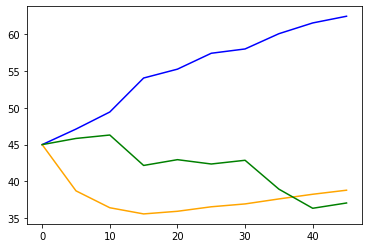

In [318]:
plt.plot(Infubinol_x_axis, Infubinol_y_axis, label = "Infubinol", color="blue")
plt.plot(Ramicane_x_axis, Ramicane_y_axis, label = "Ramicane", color="orange")
#plt.plot(Ceftamin_x_axis, Ceftamin_y_axis, label = "Ceftamin", color="red")
plt.plot(Capomulin_x_axis, Capomulin_y_axis, label = "Capomulin", color="green")

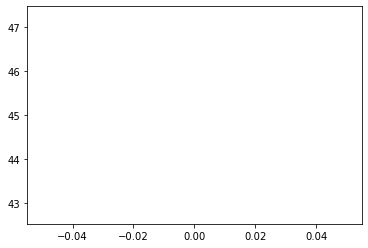

In [316]:
plt.plot(Ceftamin_x_axis, Ceftamin_y_axis, label = "Ceftamin", color="red")

In [320]:
Ceftamin_line = clean_results.loc[clean_results["Mouse ID"] == "f436",:]
Ceftamin_x_axis = Ceftamin_line["Timepoint"]
Ceftamin_y_axis = Ceftamin_line["Tumor Volume (mm3)"]

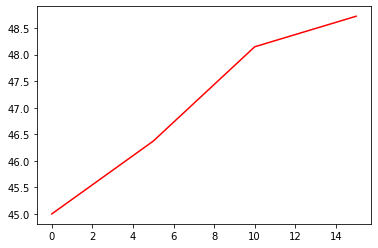

In [321]:
plt.plot(Ceftamin_x_axis, Ceftamin_y_axis, label = "Ceftamin", color="red")

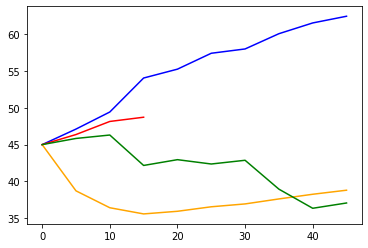

In [322]:
plt.plot(Infubinol_x_axis, Infubinol_y_axis, label = "Infubinol", color="blue")
plt.plot(Ramicane_x_axis, Ramicane_y_axis, label = "Ramicane", color="orange")
plt.plot(Ceftamin_x_axis, Ceftamin_y_axis, label = "Ceftamin", color="red")
plt.plot(Capomulin_x_axis, Capomulin_y_axis, label = "Capomulin", color="green")

In [323]:
#Love this graph! Capomulin seems to be the most effective from this comparison.

In [326]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_capomulin_vol = Capomulin_df.groupby(['Mouse ID']).mean()

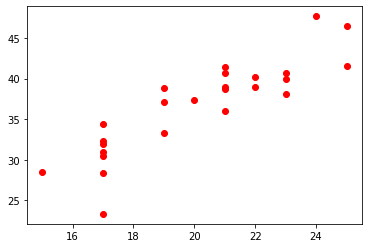

In [328]:
plt.scatter(avg_capomulin_vol['Weight (g)'], avg_capomulin_vol['Tumor Volume (mm3)'], color="red")

In [329]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [331]:
#First we get the Pearson correlation coefficient.

corr=round(st.pearsonr(avg_capomulin_vol['Weight (g)'],avg_capomulin_vol['Tumor Volume (mm3)'])[0],2)
corr

0.88

In [333]:
from scipy.stats import linregress



x_values = avg_capomulin_vol['Weight (g)']
y_values = avg_capomulin_vol['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

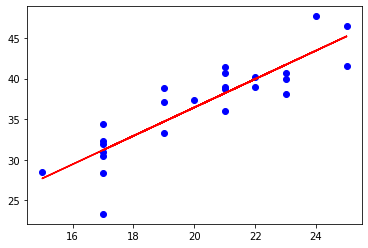

In [335]:
plt.scatter(x_values,y_values, color="blue")
plt.plot(x_values,regress_values,"r-")